In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def euler(F,T,Y0,h):
    '''
    F .... 
    T... list/array [t_0,t_f]
    Y0 ... list/array
    '''
    t = np.arange(T[0],T[1],h)
    if t[-1] != T[1]:
        t = np.append(t,T[1])
    t = np.float16(t)
        
    N = np.shape(t)[0]
    Y = np.zeros(shape=(N,1))
    Y[0,:] = Y0
    Y = np.float16(Y)
    
    for i in range(0,N-1):
        Y[i+1,:] = np.float16(Y[i,:] + h*F(t[i],Y[i,:]))
    out = {'t':t,'Y':Y}
    return out
    
    

In [3]:
def F(t,X):
    return np.float16(X[0]/t - (X[0]/t)**2)


In [12]:
def exa(x):
    return np.float16(x/(1+np.log(x)))


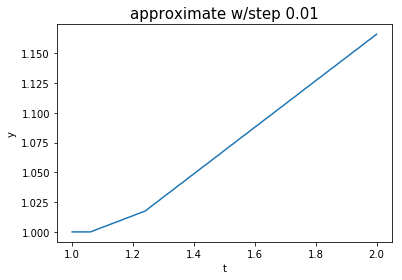

In [28]:
T = [1, 2]
Y0 = 1;
h = 0.01;
out = euler(F,T,Y0,h);
plt.plot(out['t'],out['Y'])
plt.xlabel('t')
plt.ylabel('y')
plt.title('approximate w/step '+str(h),fontsize=15)
plt.show()

In [13]:
M = 9
er = np.zeros(shape=(M,1))
steps = np.zeros(shape=(M,1))

for j in range(0,M):
    steps[j] = np.float16(1/(2**(j+1)))
    out = euler(F,T,Y0,steps[j])
    er[j] = abs(out['Y'][-1]-exa(2))


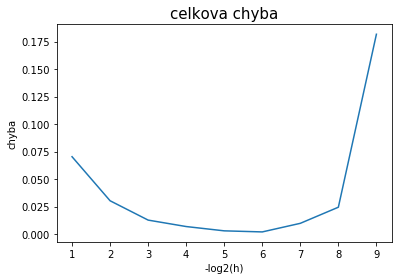

In [27]:
plt.plot(-np.log2(steps),er)
plt.xlabel('-log2(h)')
plt.ylabel('chyba')
plt.title('celkova chyba',fontsize=15)
plt.show()

<font face="Verdana" color="red">proc funguje log2(chyba)? </font>

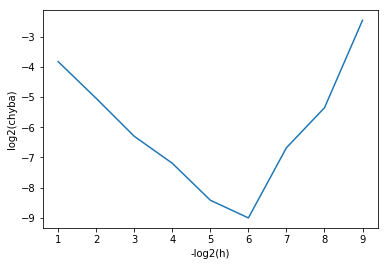

In [32]:
plt.plot(-np.log2(steps),np.log2(er))
plt.xlabel('-log2(h)')
plt.ylabel('log2(chyba)')
#plt.savefig('test.png')
plt.show()